In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import pickle as pkl

import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.7.2 anndata==0.7.8 umap==0.5.3 numpy==1.19.5 scipy==1.5.3 pandas==1.1.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6


In [3]:
path = "/home/unix/sjohri/valab_sjohri/projects/github_code/beanie-analysis/"

In [4]:
adata1 = sc.read_10x_h5(path+"/data/brca/bassez_2021/1863-counts_cells_cohort1.h5")
adata1.obs = pd.read_csv(path+"/data/brca/bassez_2021/raw_data/1872-BIOKEY_metaData_cohort1_web.csv", index_col=0)
adata1

reading /home/unix/sjohri/valab_sjohri/projects/github_code/beanie-analysis//data/brca/bassez_2021/1863-counts_cells_cohort1.h5
 (0:00:13)


AnnData object with n_obs × n_vars = 175942 × 25288
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient_id', 'timepoint', 'expansion', 'BC_type', 'cellType', 'cohort'
    var: 'gene_ids'

In [5]:
adata_concat = adata1[(adata1.obs.cellType=="Cancer_cell") & (adata1.obs.timepoint=="Pre") & (adata1.obs.BC_type.isin(["ER+","TNBC"]))]

In [6]:
adata_concat.obs["group_id"] = "NA"
adata_concat.obs.group_id = adata_concat.obs.BC_type

dict_map = {"ER+":"ER", "TNBC":"TNBC"}
adata_concat.obs["sample_id"] = "NA"
adata_concat.obs.sample_id = adata_concat.obs.patient_id + "_" + adata_concat.obs.BC_type.map(dict_map) + "_" + "treatment_naive"
adata_concat

Trying to set attribute `.obs` of view, copying.


AnnData object with n_obs × n_vars = 28290 × 25288
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient_id', 'timepoint', 'expansion', 'BC_type', 'cellType', 'cohort', 'group_id', 'sample_id'
    var: 'gene_ids'

In [7]:
adata_concat.obs

,nCount_RNA,nFeature_RNA,patient_id,timepoint,expansion,BC_type,cellType,cohort,group_id,sample_id
Cell,,,,,,,,,,
BIOKEY_10_Pre_AAACCTGCAATGGAGC-1,431,332,BIOKEY_10,Pre,E,TNBC,Cancer_cell,treatment_naive,TNBC,BIOKEY_10_TNBC_treatment_naive
BIOKEY_10_Pre_AAACCTGGTACTCAAC-1,758,471,BIOKEY_10,Pre,E,TNBC,Cancer_cell,treatment_naive,TNBC,BIOKEY_10_TNBC_treatment_naive
BIOKEY_10_Pre_AAACCTGGTCAGAGGT-1,990,584,BIOKEY_10,Pre,E,TNBC,Cancer_cell,treatment_naive,TNBC,BIOKEY_10_TNBC_treatment_naive
BIOKEY_10_Pre_AAACCTGGTCCCTTGT-1,530,386,BIOKEY_10,Pre,E,TNBC,Cancer_cell,treatment_naive,TNBC,BIOKEY_10_TNBC_treatment_naive
BIOKEY_10_Pre_AAACCTGTCTGGGCCA-1,415,333,BIOKEY_10,Pre,E,TNBC,Cancer_cell,treatment_naive,TNBC,BIOKEY_10_TNBC_treatment_naive
...,...,...,...,...,...,...,...,...,...,...
BIOKEY_24_Pre_TTTGCGCGTGCAGGTA-1,21383,4222,BIOKEY_24,Pre,NE,ER+,Cancer_cell,treatment_naive,ER+,BIOKEY_24_ER_treatment_naive
BIOKEY_24_Pre_TTTGGTTGTGCAACTT-1,1135,511,BIOKEY_24,Pre,NE,ER+,Cancer_cell,treatment_naive,ER+,BIOKEY_24_ER_treatment_naive
BIOKEY_24_Pre_TTTGTCAGTACCCAAT-1,10124,3044,BIOKEY_24,Pre,NE,ER+,Cancer_cell,treatment_naive,ER+,BIOKEY_24_ER_treatment_naive


In [8]:
adata_concat.obs.group_id.value_counts()

ER+     15210
TNBC    13080
Name: group_id, dtype: int64

In [9]:
adata_concat.obs.sample_id.value_counts()

BIOKEY_30_ER_treatment_naive      3267
BIOKEY_6_ER_treatment_naive       2912
BIOKEY_10_TNBC_treatment_naive    2583
BIOKEY_31_TNBC_treatment_naive    2247
BIOKEY_9_TNBC_treatment_naive     2059
BIOKEY_17_ER_treatment_naive      1915
BIOKEY_26_TNBC_treatment_naive    1467
BIOKEY_12_ER_treatment_naive      1425
BIOKEY_21_ER_treatment_naive      1318
BIOKEY_15_TNBC_treatment_naive    1200
BIOKEY_24_ER_treatment_naive       887
BIOKEY_1_TNBC_treatment_naive      857
BIOKEY_4_ER_treatment_naive        847
BIOKEY_19_TNBC_treatment_naive     643
BIOKEY_2_TNBC_treatment_naive      576
BIOKEY_11_TNBC_treatment_naive     567
BIOKEY_7_ER_treatment_naive        561
BIOKEY_16_TNBC_treatment_naive     457
BIOKEY_3_ER_treatment_naive        437
BIOKEY_27_ER_treatment_naive       408
BIOKEY_29_ER_treatment_naive       348
BIOKEY_14_TNBC_treatment_naive     334
BIOKEY_22_ER_treatment_naive       270
BIOKEY_18_ER_treatment_naive       212
BIOKEY_5_ER_treatment_naive        209
BIOKEY_20_ER_treatment_na

In [10]:
#Normalize gene counts
sc.pp.normalize_total(adata_concat, target_sum=1e6)

# Logarithmize the data.
sc.pp.log1p(adata_concat)

#Store raw data, for finding markers in each cluster and other analysis
adata_concat.raw = adata_concat

normalizing counts per cell
    finished (0:00:00)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


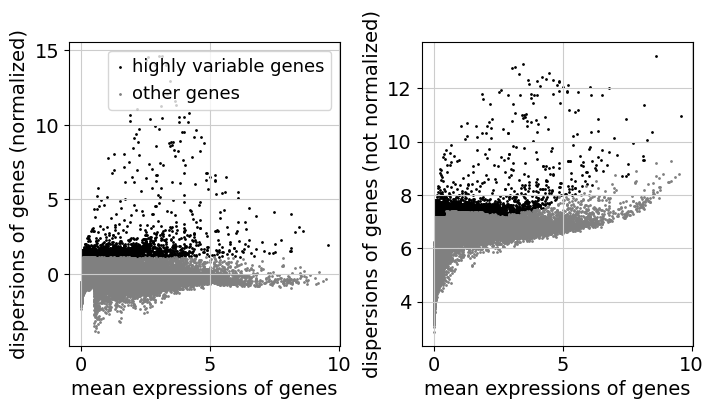

Highly variable genes: 2500


In [11]:
#variable genes for the full dataset
sc.pp.highly_variable_genes(adata_concat, n_top_genes=2500)
sc.pl.highly_variable_genes(adata_concat)

print("Highly variable genes: %d"%sum(adata_concat.var.highly_variable))
var_genes_all = adata_concat.var.highly_variable
adata_concat = adata_concat[:,var_genes_all]

In [12]:
sc.pp.scale(adata_concat, max_value=10)

/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:18)


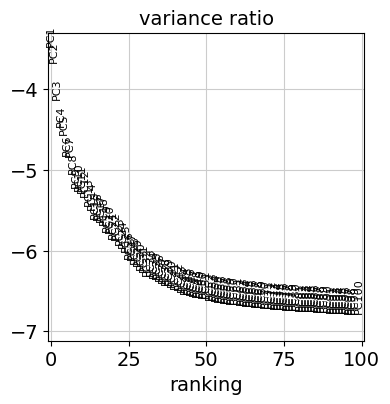

In [13]:
# Set seed
import random
initialization = 3120
random.seed(initialization)

sc.pp.pca(adata_concat, random_state=initialization, svd_solver='arpack', n_comps=100)
sc.pl.pca_variance_ratio(adata_concat, n_pcs= 100, log=True, show = True)
# sc.pl.pca_overview(adata_concat,color="n_genes")

In [14]:
sc.external.pp.harmony_integrate(adata_concat, key=["sample_id"],
                                 random_state=initialization, max_iter_harmony=50)
adata_concat.obsm['X_pca'] = adata_concat.obsm['X_pca_harmony']

2024-11-13 16:15:53,306 - harmonypy - INFO - Iteration 1 of 50
2024-11-13 16:16:10,400 - harmonypy - INFO - Iteration 2 of 50
2024-11-13 16:16:26,829 - harmonypy - INFO - Converged after 2 iterations


In [15]:
npc = 100
sc.pp.neighbors(adata_concat, random_state=initialization, n_neighbors=500, n_pcs=npc)
sc.tl.leiden(adata_concat, random_state=initialization, resolution=0.5)
sc.tl.umap(adata_concat, random_state=initialization, min_dist=0.2)

computing neighbors
    using 'X_pca' with n_pcs = 100
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:29:14)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:42)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:13)


... storing 'patient_id' as categorical
... storing 'timepoint' as categorical
... storing 'expansion' as categorical
... storing 'BC_type' as categorical
... storing 'cellType' as categorical
... storing 'cohort' as categorical
... storing 'group_id' as categorical
... storing 'sample_id' as categorical


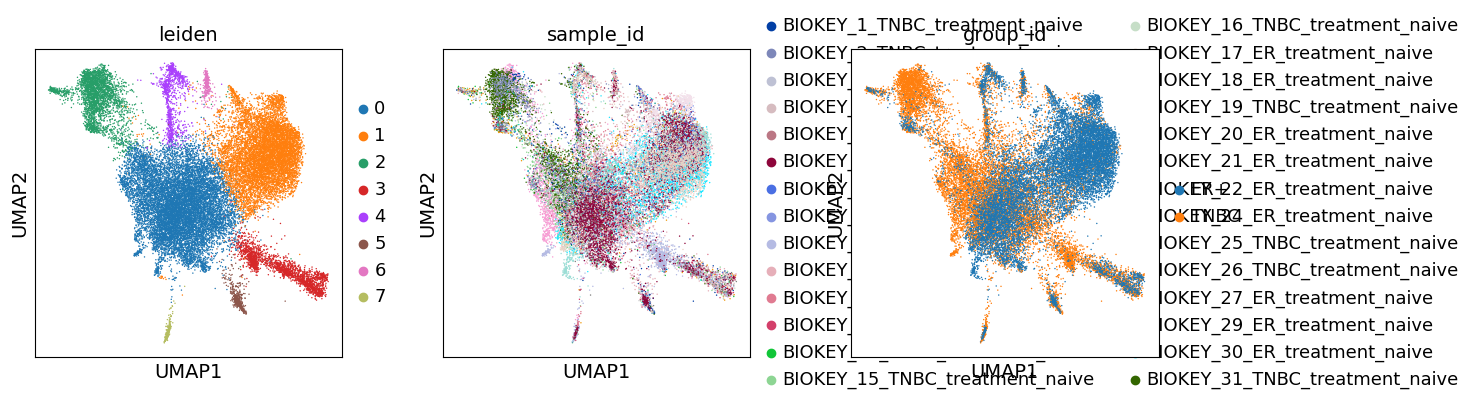

In [16]:
sc.pl.umap(adata_concat, color=['leiden', 'sample_id', 'group_id'], show = True)

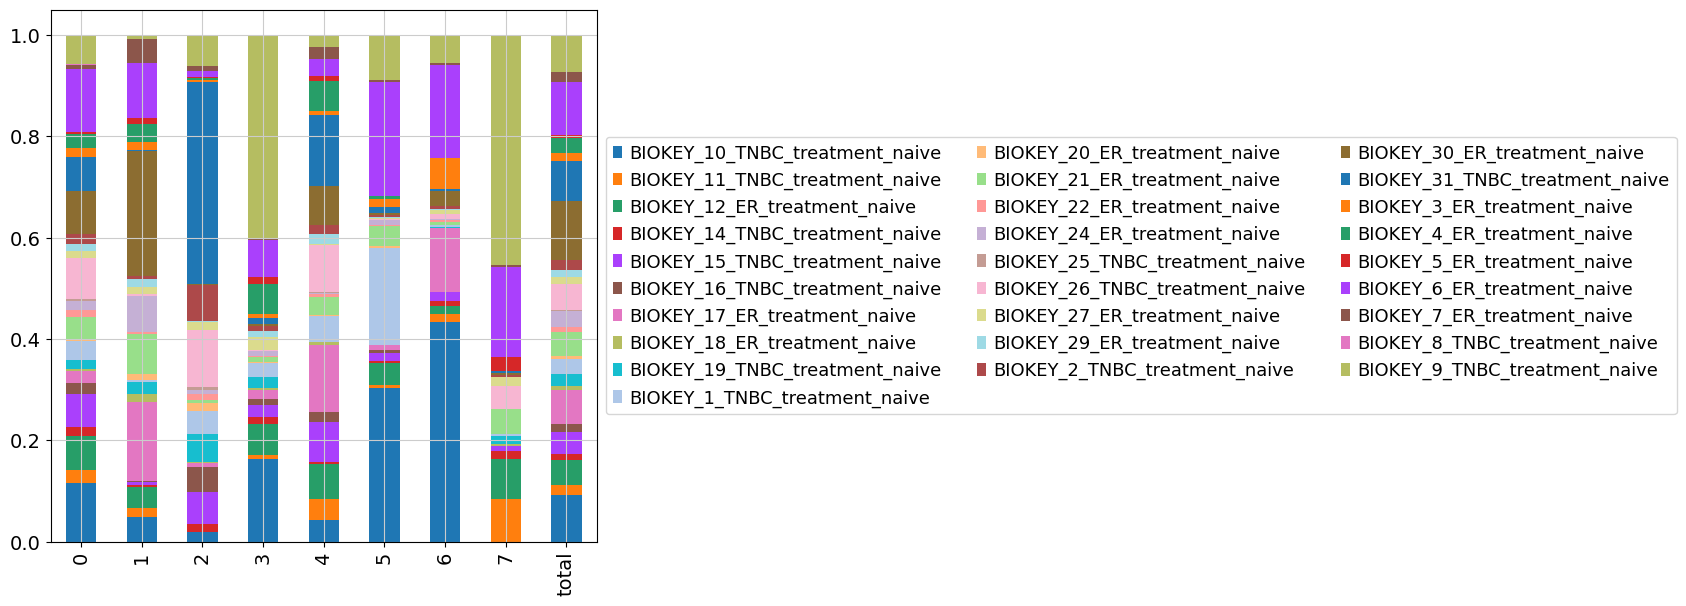

In [17]:
leiden_prop = dict()
no_clusters = len(adata_concat.obs['leiden'].unique())
for sn in adata_concat.obs['sample_id'].unique():
    temp = adata_concat[adata_concat.obs['sample_id'] == sn,:]
    cell_count = temp.obs['leiden'].value_counts()
    cell_count = cell_count.sort_index()
    cell_count = cell_count.to_dict()
    cell_count = [cell_count[str(x)] if str(x) in cell_count.keys() else 0 for x in range(0,no_clusters)]
    leiden_prop[sn] = cell_count
    
leiden_prop = pd.DataFrame(leiden_prop).T

leiden_prop['total'] = leiden_prop.sum(axis = 1)
leiden_prct = pd.DataFrame()
for x in leiden_prop.columns:
    leiden_prct[x] = leiden_prop[x]/leiden_prop[x].sum()
leiden_prct = leiden_prct.sort_index()

leiden_prct.T.plot.bar(stacked=True, legend = False,figsize=(7,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol = 3)

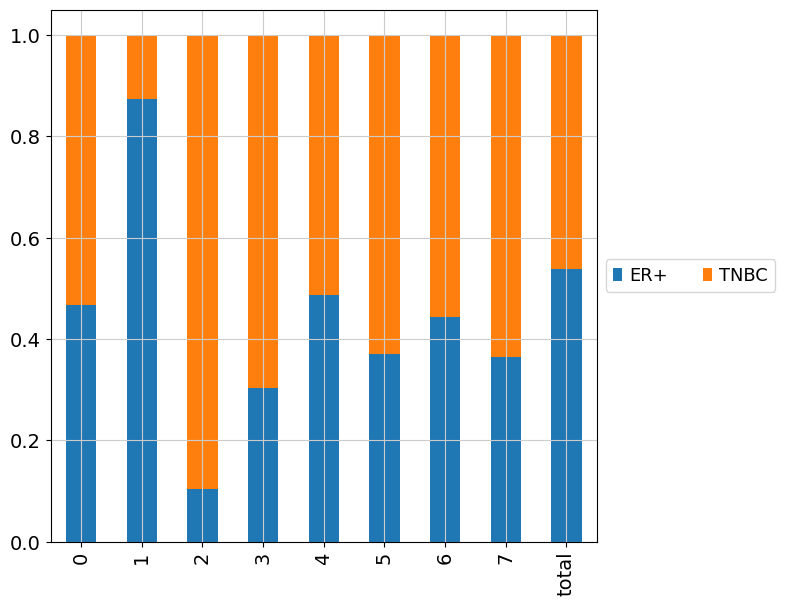

In [18]:
leiden_prop = dict()
no_clusters = len(adata_concat.obs['leiden'].unique())
for sn in adata_concat.obs['group_id'].unique():
    temp = adata_concat[adata_concat.obs['group_id'] == sn,:]
    cell_count = temp.obs['leiden'].value_counts()
    cell_count = cell_count.sort_index()
    cell_count = cell_count.to_dict()
    cell_count = [cell_count[str(x)] if str(x) in cell_count.keys() else 0 for x in range(0,no_clusters)]
    leiden_prop[sn] = cell_count
    
leiden_prop = pd.DataFrame(leiden_prop).T

leiden_prop['total'] = leiden_prop.sum(axis = 1)
leiden_prct = pd.DataFrame()
for x in leiden_prop.columns:
    leiden_prct[x] = leiden_prop[x]/leiden_prop[x].sum()
leiden_prct = leiden_prct.sort_index()

leiden_prct.T.plot.bar(stacked=True, legend = False,figsize=(7,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol = 3)

In [19]:
sc.tl.rank_genes_groups(adata_concat, 'leiden', method='wilcoxon', corr_method="benjamini-hochberg")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:56)


In [20]:
adata_concat.write_h5ad("./inputs/analysis_4/adata_full.h5ad")

In [21]:
dmap_brca = pkl.load(open("brca_sampleid_map.pkl","rb"))
adata_concat.obs.sample_id = adata_concat.obs.sample_id.map(dmap_brca)

cluster_ids = sorted(set(adata_concat.obs.leiden))
for idx in cluster_ids:
    # save non log-normalized counts (set normalized=False in BEANIE)
    adata1[adata_concat[adata_concat.obs.leiden==idx].obs.index,].write_h5ad(f"./inputs/analysis_4/ts{int(idx)+1}_adata.h5ad")
    adata_concat[adata_concat.obs.leiden==idx].obs[["sample_id","group_id"]].to_csv(f"./inputs/analysis_4/ts{int(idx)+1}_metad.csv")

/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/anndata/_core/anndata.py:1229: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'patient_id' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'timepoint' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'expansion' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'BC_type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cellType' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cohort' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'patient_id' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'timepoint' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'expans